# Contexto

Opendata AIG Brazil

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo Painel SIPAER disponível na página do CENIPA.

Dados proveniente dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Emissão de Raio Laser e Risco Baloeiro) não constam nesta base. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 têm foco principal na investigação de acidentes (AIG).
Tabelas (arquivos)

    OCORRÊNCIA.csv - Informações sobre as ocorrências.
    OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
    AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
    FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
    RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.
    Fonte: Sistema DÉDALO.

- Fonte 	http://www.fab.mil.br/cenipa/
- Autor 	Centro de Investigação e Prevenção de Acidentes Aeronáuticos
- Última Atualização 	5 de Outubro de 2021, 19:19 (UTC-03:00)
- Cobertura geográfica 	Brasil
- Cobertura temporal 	2010 a 2019
- Frequência de atualização 	Anual
- Granularidade geográfica 	Aeródromo
- Granularidade temporal 	Hora:Minuto

Number of Rows: 14345
Number of Cols: 46

**40 Colunas Categoricas:**

- ocorrencia_classificacao                 category
- ocorrencia_latitude                      category
- ocorrencia_longitude                     category
- ocorrencia_cidade                        category
- ocorrencia_uf                            category
- ocorrencia_pais                          category
- ocorrencia_aerodromo                     category
- ocorrencia_hora                          category
- investigacao_aeronave_liberada           category
- investigacao_status                      category
- divulgacao_relatorio_publicado           category
- divulgacao_dia_publicacao                category
- ocorrencia_saida_pista                   category
- ocorrencia_tipo                          category
- ocorrencia_tipo_categoria                category
- taxonomia_tipo_icao                      category
- aeronave_matricula                       category
- aeronave_operador_categoria              category
- aeronave_tipo_veiculo                    category
- aeronave_fabricante                      category
- aeronave_modelo                          category
- aeronave_tipo_icao                       category
- aeronave_motor_tipo                      category
- aeronave_motor_quantidade                category
- aeronave_pais_fabricante                 category
- aeronave_pais_registro                   category
- aeronave_registro_categoria              category
- aeronave_registro_segmento               category
- aeronave_voo_origem                      category
- aeronave_voo_destino                     category
- aeronave_fase_operacao                   category
- aeronave_tipo_operacao                   category
- aeronave_nivel_dano                      category
- fator_nome                               category
- fator_aspecto                            category
- fator_condicionante                      category
- fator_area                               category
- recomendacao_conteudo                    category
- recomendacao_status                      category
- recomendacao_destinatario                category

**07 Colunas numéricas:**

- total_recomendacoes                         int32
- total_aeronaves_envolvidas                  int32
- aeronave_pmd                                int32
- aeronave_pmd_categoria                      int32
- aeronave_assentos                           int32
- aeronave_ano_fabricacao                   : Faz quantos anos que foi fabricado
- aeronave_fatalidades_total                  int32



**04 Colunas de data/hora:**
- ocorrencia_dia                     datetime64[ns]
- ocorrencia_hora                          category
- recomendacao_dia_assinatura                object
- recomendacao_dia_encaminhamento            object

## Tabela Relacionamento

<img src="http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png" width="700 px">

# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import warnings
import math
import re

import missingno as msno

from matplotlib            import pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport

from IPython.display import display
pd.options.display.max_columns = None

from IPython.core.display  import HTML


import seaborn as sns

warnings.filterwarnings( 'ignore' )

In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

## 0.1. Helper Functions

In [2]:
def bar_plot_quantity_value_counts(data, y_, title):
    
    fig = plt.subplots(figsize = (15,4))
    sns.barplot(x= data.index.astype('object') , y = data[y_ ]);
    plt.title(title);
    
    return None
    

In [103]:
def pre_data_cleaning(df1):
    # Replace *** values for na
    df1.replace('***', np.nan, inplace= True)
    df1.replace('****', np.nan, inplace= True)
    df1.replace('*****', np.nan, inplace= True)
    df1.replace('*******', np.nan, inplace= True)
    df1.replace('*********', np.nan, inplace= True)
    
    # ocorrencia_latitude e longitude
    df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[***]',"",str(x)) )
    df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[***]',"",str(x)) )
    df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[°]',"",str(x)) )
    df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[°]',"",str(x)) )
    
    # aeronave_ano_fabricacao
    df1['aeronave_ano_fabricacao'].replace(0.0, 0, inplace = True)
    df1['aeronave_ano_fabricacao'].replace(9999.0, 0, inplace = True)
    
    # drop duplicated and identity codes columns 
    df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_pais'], axis=1, inplace=True)
    return df1
    
    

In [14]:
def load_data_site_merge():
    ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
    tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
    aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
    fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
    rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


    #merge
    aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
    aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
    aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
    df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )
    
    return df_raw


In [16]:
def load_data_raw_csv(csv):
    df_raw = pd.read_csv(csv)
    return df_raw



In [50]:
def change_dtype(df1):
    #mudar para datetime 
    df1['ocorrencia_dia'] = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')


    mask = '^([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])(\.|-|/)([1-9]|0[1-9]|1[0-2])(\.|-|/)([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])$'

    # recomendacao_dia_encaminhamento - 0 se dia for data com má formato 

    df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
    df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


    #recomendacao_dia_feedback
    df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
    df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

    #recomendacao_dia_assinatura
    df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')

    # convertendo os dados numéricos
    for c in df1.select_dtypes( include=['int64'] ):
        df1[c] = df1[c].astype('int32')

    df1['aeronave_assentos'].fillna(0, inplace=True )
    df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

    # convertendo os dados categóricos
    for c in df1.select_dtypes( include=['object'] ):
        df1[c] = df1[c].astype('category')
        
    return df1

In [81]:
def descriptive_analysis(df1):
    cat =df1.describe(include= 'category').T
    num = df1.describe().T
    
    return cat,num

In [100]:
def fill_na(df3):
    ## na for Most frequent
    #ocorrencia_uf - most frequent
    df3.ocorrencia_uf.fillna(df3.ocorrencia_uf.value_counts().index[0], inplace=True)

    #aeronave_matricula - most frequent
    df3.aeronave_matricula.fillna(df3.aeronave_matricula.value_counts().index[0], inplace=True)

    #df2.investigacao_status
    df3.investigacao_status.fillna(df3.investigacao_status.value_counts().index[0], inplace=True)

    # aeronave_tipo_veiculo
    df3.aeronave_tipo_veiculo.fillna(df3.aeronave_tipo_veiculo.value_counts().index[0], inplace=True)

    #aeronave_motor_tipo
    df3.aeronave_motor_tipo.fillna(df3.aeronave_motor_tipo.value_counts().index[0], inplace=True)

    # aeronave_motor_quantidade
    df3.aeronave_motor_quantidade.fillna(df3.aeronave_motor_quantidade.value_counts().index[0], inplace=True)

    #aeronave_registro_categoria
    df3.aeronave_registro_categoria.fillna(df3.aeronave_registro_categoria.value_counts().index[0], inplace = True)

    #aeronave_voo_origem e destino
    df3.aeronave_voo_origem.fillna(df3.aeronave_voo_origem.value_counts().index[0], inplace = True)
    df3.aeronave_voo_destino.fillna(df3.aeronave_voo_destino.value_counts().index[0], inplace = True)

    #aeronave_fase_operacao
    df3.aeronave_fase_operacao.fillna(df3.aeronave_fase_operacao.value_counts().index[0], inplace = True)

    #aeronave_nivel_dano 
    df3.aeronave_nivel_dano.fillna(df3.aeronave_nivel_dano .value_counts().index[0], inplace = True)

    ## drop na
    #aeronave_fabricante      ocorrencia_hora     
    df3.dropna(subset =['ocorrencia_hora', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_ano_fabricacao',  'aeronave_registro_segmento',  'aeronave_registro_categoria', 'aeronave_tipo_operacao'], inplace=True)

    #investigacao_aeronave_liberada - Suposições:
    ## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
    # NAO se divulgacao_relatorio_publicado == NAO 
    # os na´s que sobreram drop =647 
    df3.loc[ (df3['investigacao_aeronave_liberada'].isna()) & (df3['investigacao_status']== 'FINALIZADA') & (df3['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
    df3.loc[ ( df3['investigacao_aeronave_liberada'].isna() ) & ( df3.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
    df3.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


    # recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
    df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

    # para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
    #recomendacao_dia_encaminhamento    5698
    # não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
    df3.loc[df3['recomendacao_dia_encaminhamento'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0


    # set categoria
    df3['recomendacao_conteudo'] = df3['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

    # recomendacao_conteudo
    df3.loc[df1['recomendacao_conteudo'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
    # o restante vou dropar 
    df3.dropna(subset =['recomendacao_conteudo'], inplace=True)


    #set categoria
    df3['recomendacao_destinatario'] = df3['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
    # recomendacao_destinatario
    df3.loc[df3['recomendacao_destinatario'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

    # fill with 0 (so I can filter later)
    #set category
    df3['divulgacao_dia_publicacao'] = df3['divulgacao_dia_publicacao'].cat.add_categories(0)
    df3.divulgacao_dia_publicacao.fillna(0, inplace = True)
    
    return df3

    

In [113]:
def feature_engineering(df4):
    # month
    df4['month'] = df4['ocorrencia_dia'].dt.month
    # day
    df4['day'] = df4['ocorrencia_dia'].dt.day
    # week of year
    df4['week_of_year'] = df4['ocorrencia_dia'].dt.weekofyear


    # divulgacao_dia_publicacao
    df4['divulgacao_dia_publicacao'] = pd.to_datetime(df4.divulgacao_dia_publicacao)

    df4['waiting_days_publish'] = ((df4['divulgacao_dia_publicacao'] - df4.ocorrencia_dia)).apply(lambda x:x.days ).astype(int)
    df4['waiting_days_publish'] = df4['waiting_days_publish'].apply( lambda x: 20000 if x < 0 else x)
    
    return df4

In [104]:
df_raw = load_data_raw_csv('./data/ocorrencias_aeronauticas_raw.csv')
df1 = pre_data_cleaning(df_raw)
df1 = change_dtype(df1)
cat, num = descriptive_analysis(df1)

df2 = fill_na(df1)

df3 = feature_engineering(df2)

In [115]:
df3.sample(2)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,month,day,week_of_year,waiting_days_publish
16840,INCIDENTE,-8.126388888888,-34.92277777777,RECIFE,PE,SBRF,2020-05-16,17:20:00,SIM,FINALIZADA,NaN,NÃO,1970-01-01,0,1,NÃO,COM PARA-BRISAS / JANELA / PORTA,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PRAQI,NaN,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,23000,75,2013.0,BRASIL,BRASIL,AVIÃO,REGULAR,GUARARAPES - GILBERTO FREYRE,FERNANDO DE NORONHA,CRUZEIRO,REGULAR,LEVE,0,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,1970-01-01,NA - relatório Não publicado,NaN,NaN,NA - relatório Não publicado,5,16,20,20000
5837,ACIDENTE,-3.1088888889,-58.4547222222,ITACOATIARA,AM,NaN,2011-10-18,19:50:00,SIM,FINALIZADA,A - 623/CENIPA/2014,SIM,2016-06-03,2,1,NÃO,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,PRHBC,NaN,HELICÓPTERO,EUROCOPTER FRANCE,AS 355 N,AS55,TURBOEIXO,BIMOTOR,2600,2600,6,2001.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,TÁXI AÉREO,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A - 623/CENIPA/2014 – 01,2016-06-03 00:00:00,2016-07-14 00:00:00,2016-12-12,"Realizar gestões, junto à empresa Helibarra Tá...",CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,10,18,42,1690


## 0.2. Loading data

In [7]:
ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


#merge
aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )



In [8]:
df_raw.sample(1)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
6898,65827,65827,65827,65827,65827,INCIDENTE,-3.0388888889,-60.0461111111,MANAUS,AM,BRASIL,SBEG,14/10/2016,13:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,PRTTH,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,52.0,1996.0,BRASIL,BRASIL,AVIÃO,REGULAR,EDUARDO GOMES,EDUARDO GOMES,SUBIDA,REGULAR,NENHUM,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_raw.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                17646 non-null  int64  
 1   codigo_ocorrencia1               17646 non-null  int64  
 2   codigo_ocorrencia2               17646 non-null  int64  
 3   codigo_ocorrencia3               17646 non-null  int64  
 4   codigo_ocorrencia4               17646 non-null  int64  
 5   ocorrencia_classificacao         17646 non-null  object 
 6   ocorrencia_latitude              16065 non-null  object 
 7   ocorrencia_longitude             16065 non-null  object 
 8   ocorrencia_cidade                17646 non-null  object 
 9   ocorrencia_uf                    17646 non-null  object 
 10  ocorrencia_pais                  17646 non-null  object 
 11  ocorrencia_aerodromo             17646 non-null  object 
 12  ocorrencia_dia    

In [9]:
#df_raw.to_csv('./data/ocorrencias_aeronauticas_raw.csv', index=False)

In [3]:
df_raw = pd.read_csv('./data/ocorrencias_aeronauticas_raw.csv')

In [4]:
with pd.option_context('display.max_rows', 10):
    print(df_raw)

       codigo_ocorrencia  codigo_ocorrencia1  codigo_ocorrencia2  \
0                  40211               40211               40211   
1                  40349               40349               40349   
2                  40351               40351               40351   
3                  39527               39527               39527   
4                  39527               39527               39527   
...                  ...                 ...                 ...   
17641              80245               80245               80245   
17642              80247               80247               80247   
17643              80251               80251               80251   
17644              80257               80257               80257   
17645              80259               80259               80259   

       codigo_ocorrencia3  codigo_ocorrencia4 ocorrencia_classificacao  \
0                   40211               40211                INCIDENTE   
1                   40349          

# 1.0.  DESCRICAO DOS DADOS

In [4]:
df1 = df_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Summarization

### 1.2.1 Data Dimensions

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 59


In [6]:
# mean % of  nulls
df1.isna().mean()*100

codigo_ocorrencia                   0.000000
codigo_ocorrencia1                  0.000000
codigo_ocorrencia2                  0.000000
codigo_ocorrencia3                  0.000000
codigo_ocorrencia4                  0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 8.959538
ocorrencia_longitude                8.959538
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.000000
ocorrencia_pais                     0.000000
ocorrencia_aerodromo                0.000000
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     11.061997
investigacao_status                 2.006120
divulgacao_relatorio_numero         4.714950
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia

In [89]:
# description of numerical data , round(2)
df1.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
codigo_ocorrencia,17646.0,55161.196758,14019.913462,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia1,17646.0,55161.196758,14019.913462,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia2,17646.0,55161.196758,14019.913462,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia3,17646.0,55161.196758,14019.913462,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia4,17646.0,55161.196758,14019.913462,39115.0,44606.75,49640.5,66430.75,80259.0
total_recomendacoes,17646.0,4.125921,5.555002,0.0,0.00,2.0,6.00,23.0
total_aeronaves_envolvidas,17646.0,1.038196,0.194317,1.0,1.00,1.0,1.00,3.0
aeronave_pmd,17646.0,12960.213930,35548.754335,0.0,1315.00,2155.0,6033.00,396895.0
aeronave_pmd_categoria,17646.0,12960.213930,35548.754335,0.0,1315.00,2155.0,6033.00,396895.0
aeronave_assentos,17646.0,21.513544,49.441564,0.0,2.00,6.0,9.00,384.0


In [90]:
# description for categorical data
df1.describe(include= 'category').T

,count,unique,top,freq
ocorrencia_classificacao,17646,3,ACIDENTE,11068
ocorrencia_latitude,17646,2720,nan,2636
ocorrencia_longitude,17646,2717,nan,2639
ocorrencia_cidade,17646,1133,RIO DE JANEIRO,1433
ocorrencia_uf,17642,27,SP,3575
ocorrencia_pais,17646,1,BRASIL,17646
ocorrencia_aerodromo,9663,529,SBRJ,778
ocorrencia_hora,17645,982,12:26:00,724
investigacao_aeronave_liberada,12475,2,SIM,12444
investigacao_status,17292,2,FINALIZADA,16765


### 1.2.3  Pre data cleaning

In [7]:
# Replace *** values for na
df1.replace('***', np.nan, inplace= True)
df1.replace('****', np.nan, inplace= True)
df1.replace('*****', np.nan, inplace= True)
df1.replace('*******', np.nan, inplace= True)
df1.replace('*********', np.nan, inplace= True)


In [9]:
# ocorrencia_latitude e longitude

df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[***]',"",str(x)) )
df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[***]',"",str(x)) )
df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[°]',"",str(x)) )
df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[°]',"",str(x)) )

In [10]:
# aeronave_ano_fabricacao
df1['aeronave_ano_fabricacao'].replace(0.0, 0, inplace = True)
df1['aeronave_ano_fabricacao'].replace(9999.0, 0, inplace = True)





In [12]:
# drop duplicated and identity codes columns 
df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_pais'], axis=1, inplace=True)

In [177]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 53


In [96]:
# description for categorical data
df1.describe(include= object).T

,count,unique,top,freq
ocorrencia_classificacao,17646,3,ACIDENTE,11068
ocorrencia_latitude,17646,2720,nan,2636
ocorrencia_longitude,17646,2717,nan,2639
ocorrencia_cidade,17646,1133,RIO DE JANEIRO,1433
ocorrencia_uf,17642,27,SP,3575
ocorrencia_aerodromo,9663,529,SBRJ,778
ocorrencia_dia,17646,3155,12/08/2010,723
ocorrencia_hora,17645,982,12:26:00,724
investigacao_aeronave_liberada,12475,2,SIM,12444
investigacao_status,17292,2,FINALIZADA,16765


In [178]:
# mean % of  nulls
df1.isna().mean()*100

ocorrencia_classificacao            0.000000
ocorrencia_latitude                 0.000000
ocorrencia_longitude                0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.022668
ocorrencia_aerodromo               45.239714
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     29.304092
investigacao_status                 2.006120
divulgacao_relatorio_numero        22.928709
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia_tipo                     0.000000
ocorrencia_tipo_categoria           0.000000
taxonomia_tipo_icao                 0.000000
aeronave_matricula                  0.079338
aeronave_operador_categoria        82.817636
aeronave_tipo_veiculo               0.974725
aeronave_f

## 1.2. Data Types

### Alterando os tipos dos dados para facilitar a manipulação de dados e reduzir o uso de recursos computacionais

In [45]:
#mudar para datetime 
df1['ocorrencia_dia'] = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')


mask = '^([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])(\.|-|/)([1-9]|0[1-9]|1[0-2])(\.|-|/)([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])$'

# recomendacao_dia_encaminhamento - 0 se dia for data com má formato 

df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


#recomendacao_dia_feedback
df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply( lambda x: re.search(mask, x ).group(0)  if re.search(mask, str(x) ) else 0)
df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

#recomendacao_dia_assinatura
df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')

In [46]:
# convertendo os dados numéricos
for c in df1.select_dtypes( include=['int64'] ):
    df1[c] = df1[c].astype('int32')
    


In [47]:
# 35  aeronave_assentos                17646 non-null  int32  
# aeronave_assentos - 0 para na - lidarei com os na mais tarde
df1['aeronave_assentos'].fillna(0, inplace=True )
df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

# convertendo os dados categóricos
for c in df1.select_dtypes( include=['object'] ):
    df1[c] = df1[c].astype('category')

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   codigo_ocorrencia                17646 non-null  int32         
 1   codigo_ocorrencia1               17646 non-null  int32         
 2   codigo_ocorrencia2               17646 non-null  int32         
 3   codigo_ocorrencia3               17646 non-null  int32         
 4   codigo_ocorrencia4               17646 non-null  int32         
 5   ocorrencia_classificacao         17646 non-null  category      
 6   ocorrencia_latitude              17646 non-null  category      
 7   ocorrencia_longitude             17646 non-null  category      
 8   ocorrencia_cidade                17646 non-null  category      
 9   ocorrencia_uf                    17642 non-null  category      
 10  ocorrencia_pais                  17646 non-null  category 

# 2. Understanding the data  EDA

In [183]:
df2 = df1.copy()

In [367]:
## PROFILE  

#profile = ProfileReport( df2 )
#profile.to_file( 'profile_v2.html' )

Summarize dataset:   0%|          | 0/66 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [467]:
#for coluna in df1.columns:
#    print(coluna.upper())
#    grafico = px.histogram(df1, x=coluna, color="ocorrencia_classificacao");
#    grafico.show()

#### Nr of seats

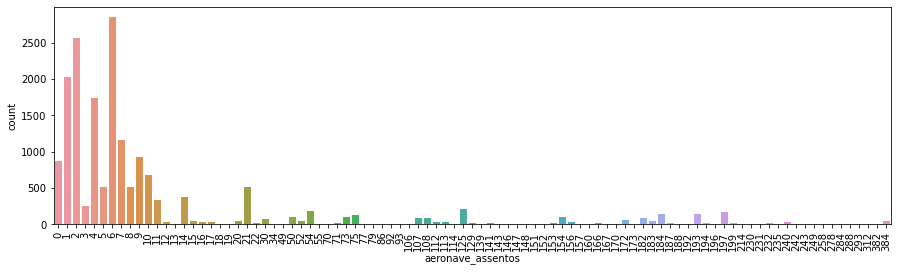

In [27]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_assentos', data = df2);
plt.xticks(rotation=90);


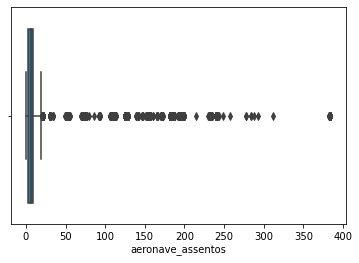

In [32]:
sns.boxplot(df2.aeronave_assentos);


#### Ano de Fabricação X Fabricante

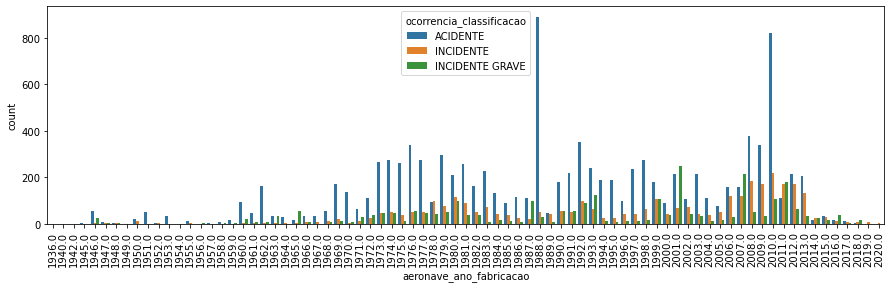

In [186]:
sub_year = df2[df2.aeronave_ano_fabricacao != 0 ]
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_ano_fabricacao', hue='ocorrencia_classificacao' ,data = sub_year);
plt.xticks(rotation=90);

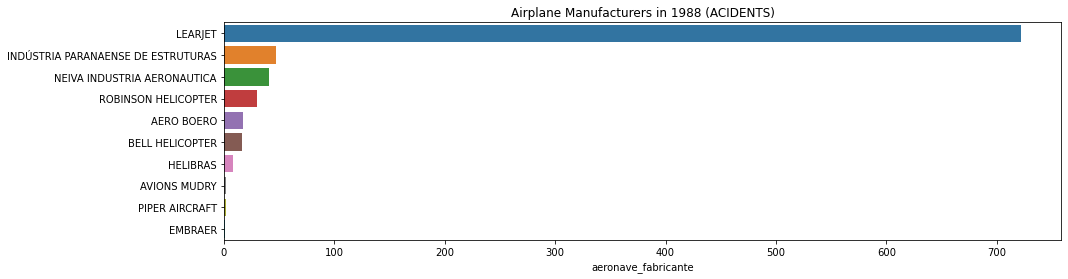

In [243]:
# in 1988 who has the manufacturer
fabricante_1988 = df2[df2.ocorrencia_classificacao == ('ACIDENTE' )][df2.aeronave_ano_fabricacao == 1988]['aeronave_fabricante'].value_counts()[0:10].to_frame()
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_1988.aeronave_fabricante, y =fabricante_1988.index.astype('object') );
a_plot. set(ylim=(0, 10))
plt.title("Airplane Manufacturers in 1988 (ACIDENTS)");

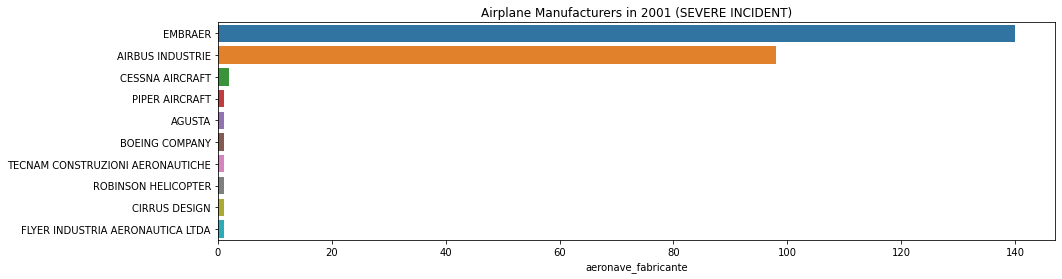

In [245]:
# in 2001 - serious incident
fabricante_2001 = df2[df2.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df2.aeronave_ano_fabricacao == 2001]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2001 = fabricante_2001[fabricante_2001.aeronave_fabricante >0]
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2001.aeronave_fabricante, y = fabricante_2001.index.astype('object'));
plt.title("Airplane Manufacturers in 2001 (SEVERE INCIDENT)");


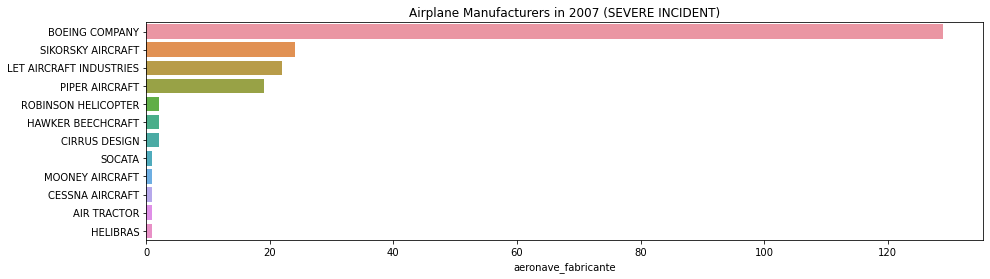

In [247]:
# in 2007 - serious incident
fabricante_2007 = df2[df2.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df2.aeronave_ano_fabricacao == 2007]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2007 = fabricante_2007[fabricante_2007.aeronave_fabricante >0]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2007.aeronave_fabricante, y = fabricante_2007.index.astype('object') );
plt.title("Airplane Manufacturers in 2007 (SEVERE INCIDENT)");

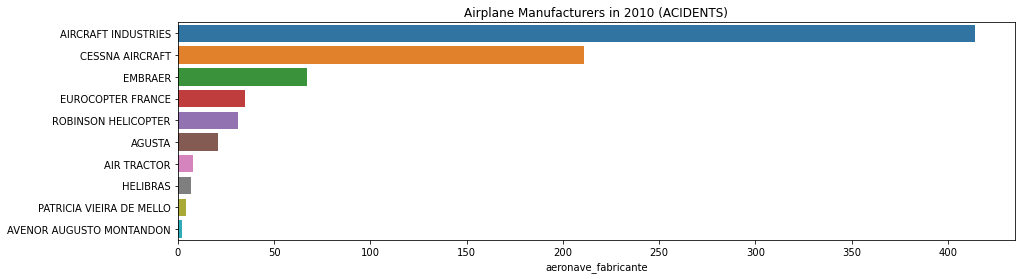

In [248]:
# in 2010 - acident
fabricante_2010 = df2[df1.ocorrencia_classificacao == ( 'ACIDENTE')][df2.aeronave_ano_fabricacao == 2010]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2010 = fabricante_2010.sort_values('aeronave_fabricante', ascending = False).iloc[:10]
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2010.aeronave_fabricante, y = fabricante_2010.index.astype('object'));
plt.title("Airplane Manufacturers in 2010 (ACIDENTS)");

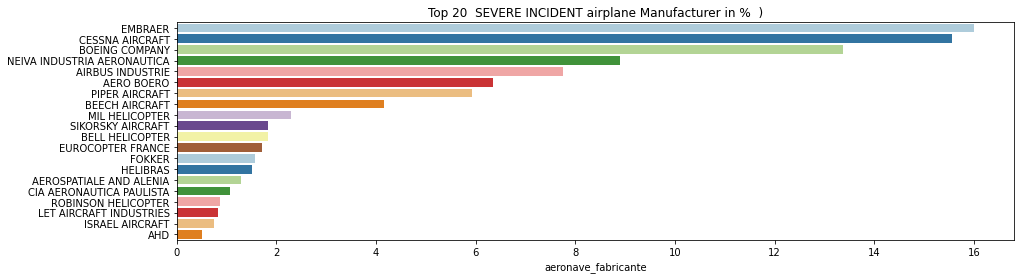

In [249]:
aux = df2[df2.ocorrencia_classificacao == ('INCIDENTE GRAVE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index.astype('object'), palette= "Paired" );
plt.title("Top 20  SEVERE INCIDENT airplane Manufacturer in %  )");

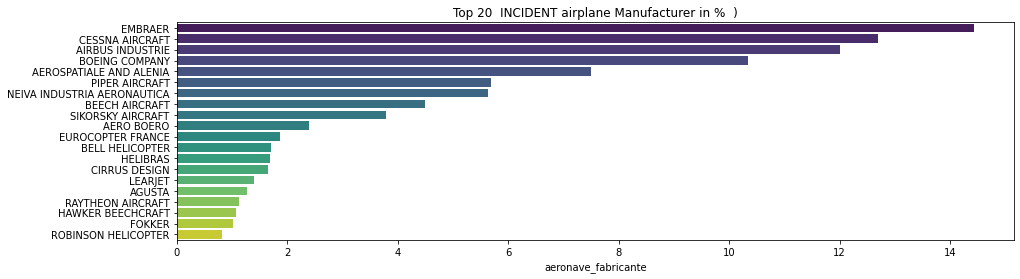

In [250]:
aux = df2[df2.ocorrencia_classificacao == ('INCIDENTE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index.astype('object'), palette= "viridis" );
plt.title("Top 20  INCIDENT airplane Manufacturer in %  )");

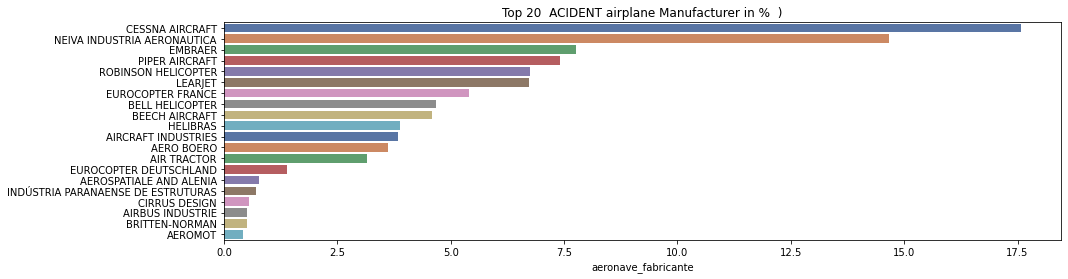

In [251]:
aux = df2[df2.ocorrencia_classificacao == ('ACIDENTE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index.astype('object'), palette="deep"  );
plt.title("Top 20  ACIDENT airplane Manufacturer in %  )");

#### By City and state

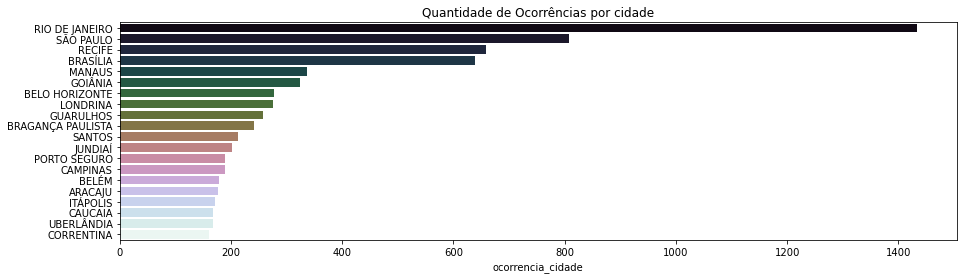

In [252]:
fig = plt.subplots(figsize = (15,4))
city_total = df2.ocorrencia_cidade.value_counts().to_frame()
city_total = city_total.sort_values('ocorrencia_cidade', ascending = False).iloc[:20]

sns.barplot(x= city_total.ocorrencia_cidade, y = city_total.index.astype('object') ,palette="cubehelix");
plt.title("Quantidade de Ocorrências por cidade");

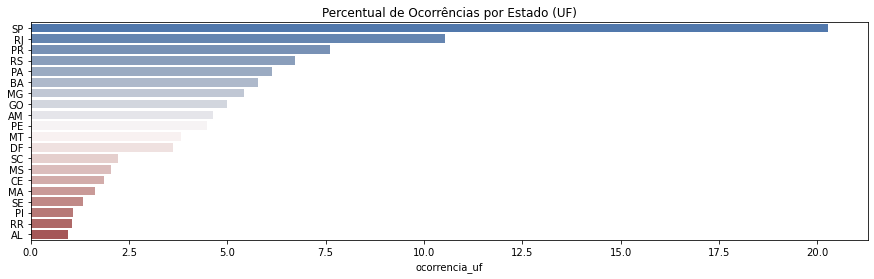

In [253]:
fig = plt.subplots(figsize = (15,4))
uf_total = df2.ocorrencia_uf.value_counts(normalize= True).to_frame()
uf_total = uf_total.sort_values('ocorrencia_uf', ascending = False).iloc[:20]

sns.barplot(x= uf_total.ocorrencia_uf*100, y = uf_total.index.astype('object') ,palette="vlag");
plt.title("Percentual de Ocorrências por Estado (UF)");

#### By Classification X published report

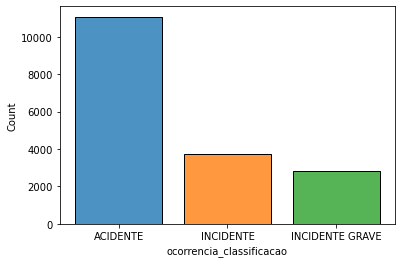

In [254]:

sns.histplot(data=df2, x="ocorrencia_classificacao", hue="ocorrencia_classificacao", shrink=.8, alpha=.8, legend=False);

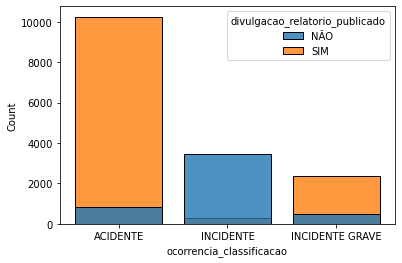

In [255]:
# ocorrencia X relatório
sns.histplot(data=df2, x="ocorrencia_classificacao", hue="divulgacao_relatorio_publicado", shrink=.8, alpha=.8, legend=True);

In [256]:
# relação divulgacao_relatorio_publicado X gravidade 
df2.divulgacao_relatorio_publicado == 'NÃO'
df2.groupby(['divulgacao_relatorio_publicado',  'ocorrencia_classificacao'])[  'ocorrencia_classificacao'].agg([ 'count'])

count
divulgacao_relatorio_publicado ocorrencia_classificacao       
NÃO                            ACIDENTE                    820
                               INCIDENTE                  3440
                               INCIDENTE GRAVE             484
SIM                            ACIDENTE                  10248
                               INCIDENTE                   292
                               INCIDENTE GRAVE            2362

In [257]:
pd.crosstab(index = [ df2.divulgacao_relatorio_publicado], columns= [df2.ocorrencia_classificacao], normalize = True).T.style.highlight_max(color = 'lightgreen', axis = 1)

divulgacao_relatorio_publicado,NÃO,SIM
ocorrencia_classificacao,,
ACIDENTE,0.046469,0.580755
INCIDENTE,0.194945,0.016548
INCIDENTE GRAVE,0.027428,0.133855


#### Aicraft type 

In [258]:
# %  fatalidades em acidentes, incidentes e incidente grave por tipo 
pd.crosstab(index= [df2.aeronave_tipo_veiculo], columns=[df2['ocorrencia_classificacao'], df2.aeronave_fatalidades_total], normalize = True).T.style.highlight_max(color = 'lightgreen', axis = 1)

- Aviões tem mais ocorrências, seguido de helicópteros, inclusive em nr de fatalidades,
com exceção quanto o nr de fatalidade =8 que o helicoptero lidera
Teria relação com peso? 

#### Number of Aircrafts involved

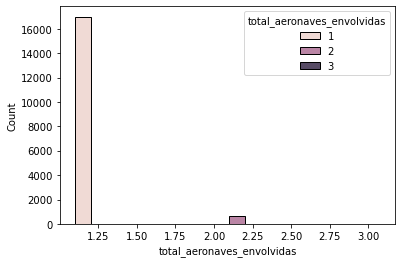

In [259]:
sns.histplot(data= df2, x= df2.total_aeronaves_envolvidas, hue= df2.total_aeronaves_envolvidas, shrink=.8, alpha=.8, legend=True );

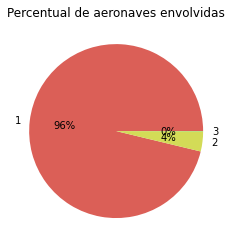

In [261]:
perc_nr_aircraft =df2.total_aeronaves_envolvidas.value_counts(normalize= True).to_frame()
colors = sns.color_palette('hls')
plt.pie(perc_nr_aircraft.total_aeronaves_envolvidas,labels = perc_nr_aircraft.index,colors = colors,  autopct='%.0f%%');
plt.title("Percentual de aeronaves envolvidas");

#### by Type and Category

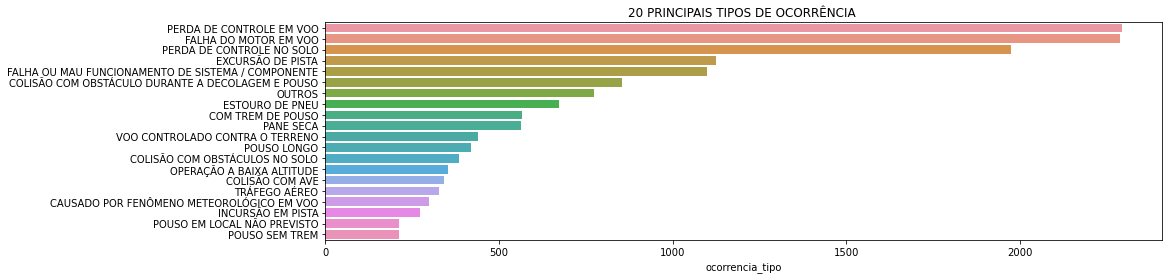

In [262]:
aux_tipo = df2.ocorrencia_tipo.value_counts()[:20].to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= aux_tipo.ocorrencia_tipo, y = aux_tipo.index.astype('object') );
plt.title("20 PRINCIPAIS TIPOS DE OCORRÊNCIA ");

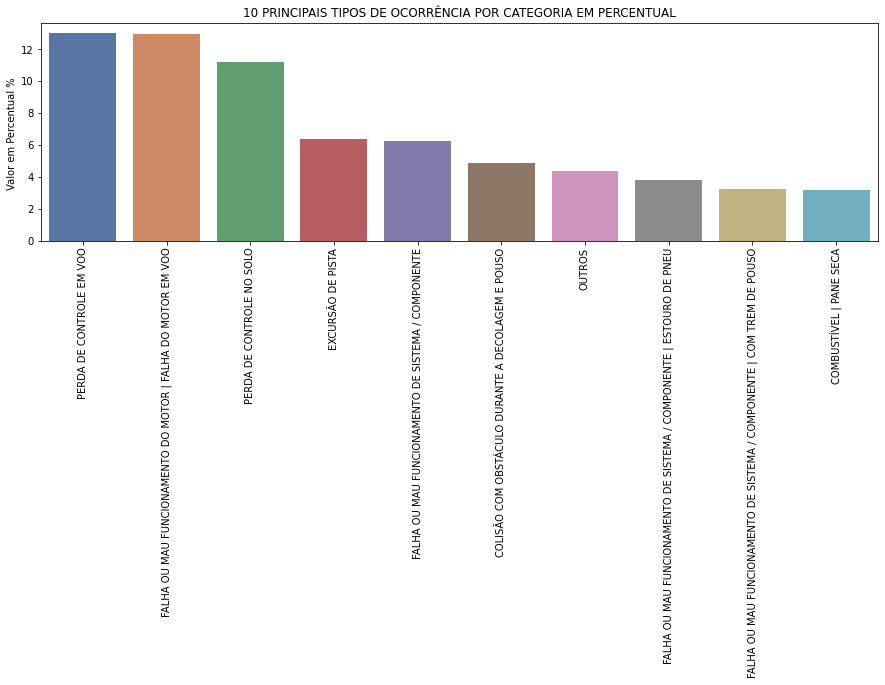

In [263]:
aux_tipo_categoria = df2.ocorrencia_tipo_categoria.value_counts(normalize= True)[:10].to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= aux_tipo_categoria.index.astype('object') , y = aux_tipo_categoria.ocorrencia_tipo_categoria*100,palette="deep" );
plt.ylabel("Valor em Percentual % ");
plt.title("10 PRINCIPAIS TIPOS DE OCORRÊNCIA POR CATEGORIA EM PERCENTUAL");
plt.xticks(rotation=90);

In [28]:
# Os 6 primeiros já Representam 48% dos tipos por categoria
df1.ocorrencia_tipo_categoria.value_counts(normalize= True).iloc[:6].sum()

0.5460727643658619

#### Taxonomia_tipo_icao

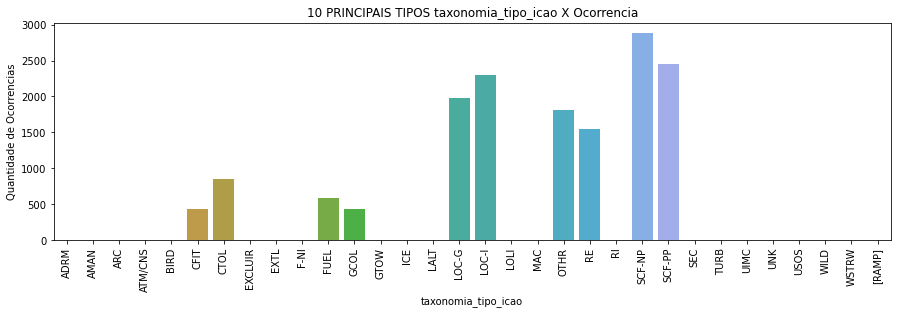

In [268]:
# Taxonomia_tipo_icao X classificação_ocorrencia
names_taxonomia = df2.taxonomia_tipo_icao.value_counts(normalize= True)[:10].index.astype('object')
aux_ta= df2.loc[df2.taxonomia_tipo_icao.isin(names_taxonomia), :]
group_taxonomia =aux_ta.groupby(['taxonomia_tipo_icao'] )['ocorrencia_classificacao'].count().sort_values(ascending=False).to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= group_taxonomia.index , y = group_taxonomia.ocorrencia_classificacao );
plt.ylabel("Quantidade de Ocorrencias");
plt.title("10 PRINCIPAIS TIPOS taxonomia_tipo_icao X Ocorrencia");
plt.xticks(rotation=90);

####  By aircraft type X nivel de Dano


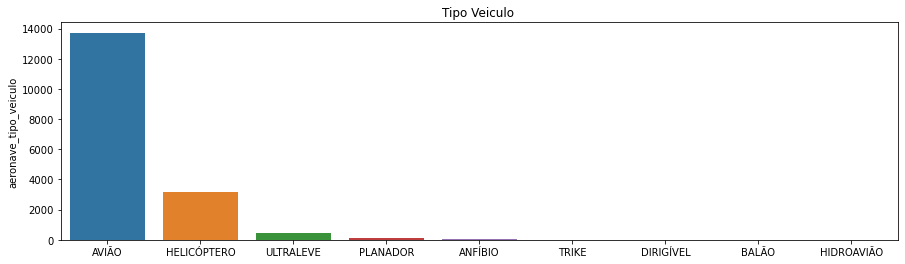

In [271]:
data = df2.aeronave_tipo_veiculo.value_counts().to_frame()
bar_plot_quantity_value_counts(data, 'aeronave_tipo_veiculo' , 'Tipo Veiculo ')

In [272]:
# In Percentage
df2.aeronave_tipo_veiculo.value_counts(normalize = True)

AVIÃO          0.785567
HELICÓPTERO    0.181985
ULTRALEVE      0.024322
PLANADOR       0.005608
ANFÍBIO        0.002003
TRIKE          0.000286
DIRIGÍVEL      0.000114
BALÃO          0.000057
HIDROAVIÃO     0.000057
Name: aeronave_tipo_veiculo, dtype: float64

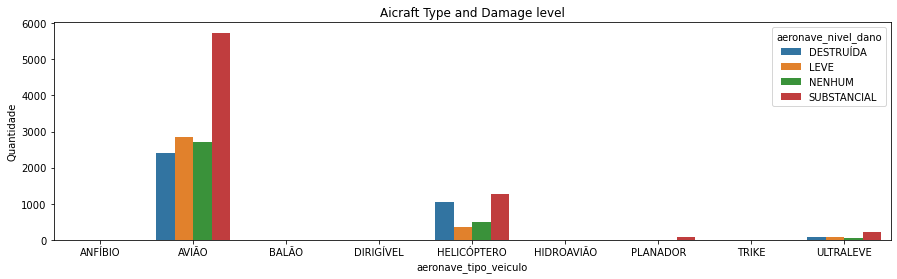

In [273]:
sub_type = df1[df2.aeronave_tipo_veiculo.isin(['AVIÃO','HELICÓPTERO', 'ULTRALEVE','PLANADOR'])]
aux = sub_type.groupby(['aeronave_tipo_veiculo','aeronave_nivel_dano' ])['aeronave_tipo_veiculo'].agg( Quantidade=('count')).reset_index()

fig = plt.subplots(figsize = (15,4))

sns.barplot(y="Quantidade", 
x="aeronave_tipo_veiculo", 
hue="aeronave_nivel_dano", 
data=aux);

plt.title('Aicraft Type and Damage level');

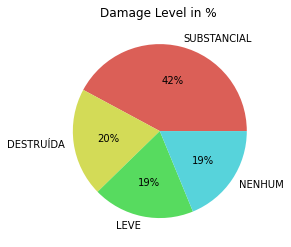

In [274]:
nivel_damage = df2.aeronave_nivel_dano.value_counts(normalize= True).to_frame()
colors = sns.color_palette('hls')
plt.pie(nivel_damage.aeronave_nivel_dano,labels = nivel_damage.index,colors = colors,  autopct='%.0f%%');
plt.title("Damage Level in % ");

#### Engine type and quantity

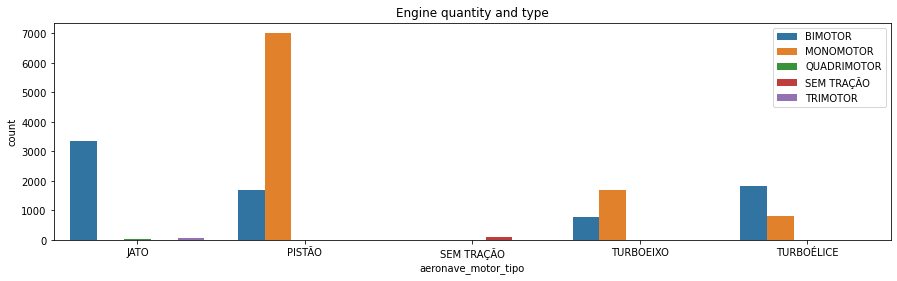

In [275]:

fig = plt.subplots(figsize = (15,4))
sns.countplot( x= 'aeronave_motor_tipo', hue='aeronave_motor_quantidade', data = df2 );
plt.legend(loc='upper right');
plt.title('Engine quantity and type');
            

#### Aircraft Register - Category and Segmentation

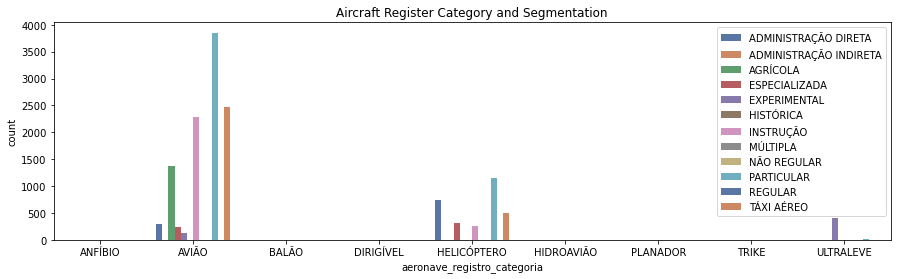

In [276]:
sub_category = df2[df2['aeronave_registro_categoria'].isin(['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE'])][df2['aeronave_registro_segmento'].isin(['PARTICULAR', 'TÁXI AÉREO', 'REGULAR ','INSTRUÇÃO','AGRÍCOLA','ADMINISTRAÇÃO DIRETA' ,'EXPERIMENTAL','ESPECIALIZADA'])]
fig = plt.subplots(figsize = (15,4))
sns.countplot( x= 'aeronave_registro_categoria', hue='aeronave_registro_segmento', data = sub_category , palette= 'deep');
plt.legend(loc='upper right');
plt.title('Aircraft Register Category and Segmentation');

#### Operation Type

In [277]:
sub_category.groupby(['aeronave_registro_categoria', 'aeronave_tipo_operacao'])['aeronave_tipo_operacao'].agg(Quantity = 'count').sort_values('Quantity', ascending = False)

Quantity
aeronave_registro_categoria aeronave_tipo_operacao          
AVIÃO                       PRIVADA                     3582
                            TÁXI AÉREO                  2419
                            INSTRUÇÃO                   2231
                            AGRÍCOLA                    1779
HELICÓPTERO                 PRIVADA                     1155
...                                                      ...
DIRIGÍVEL                   TÁXI AÉREO                     0
ANFÍBIO                     ESPECIALIZADA                  0
HIDROAVIÃO                  AGRÍCOLA                       0
                            ESPECIALIZADA                  0
ULTRALEVE                   TÁXI AÉREO                     0

[81 rows x 1 columns]

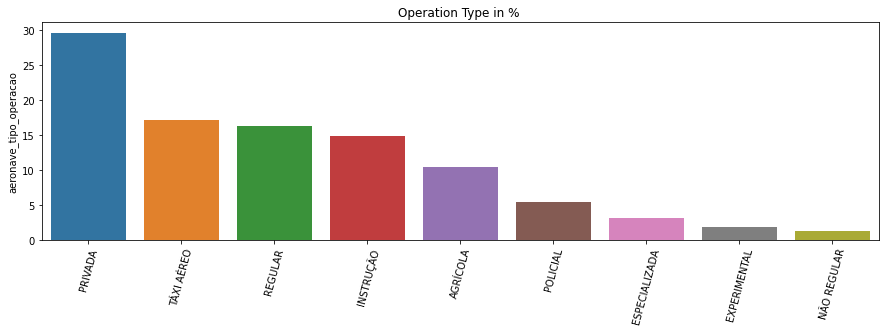

In [278]:
operation_type = (df2.aeronave_tipo_operacao.value_counts(normalize= True)*100).to_frame()
bar_plot_quantity_value_counts(operation_type, 'aeronave_tipo_operacao' , 'Operation Type in % ')
plt.xticks(rotation=75);

#### Flight Origin and Destination

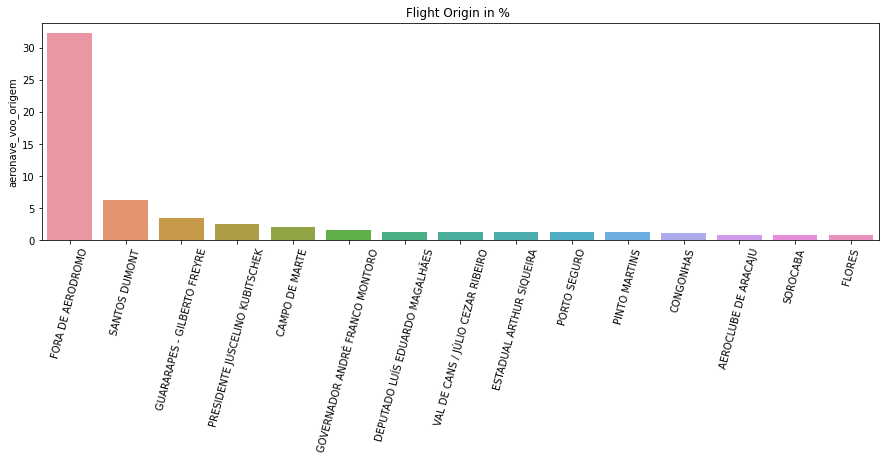

In [279]:
data = (df2.aeronave_voo_origem.value_counts(normalize= True)*100).to_frame()[:15]
bar_plot_quantity_value_counts(data, 'aeronave_voo_origem' , 'Flight Origin in % ')
plt.xticks(rotation=75);

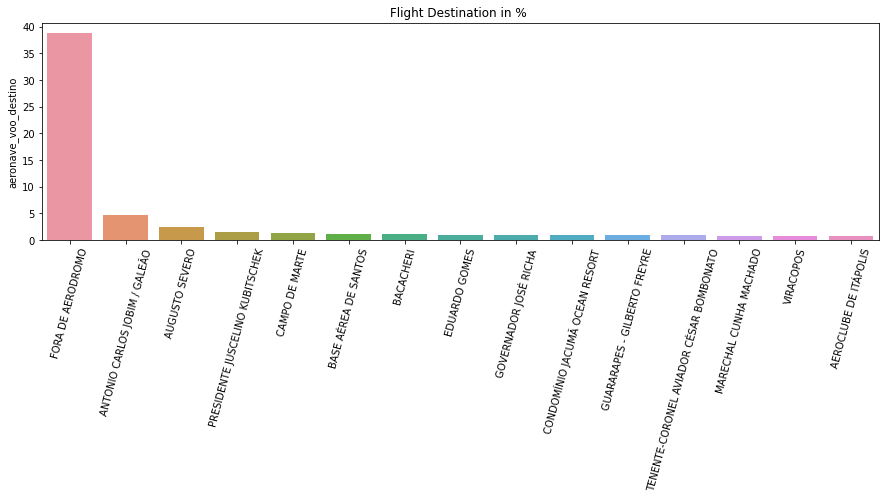

In [280]:
data = (df2.aeronave_voo_destino.value_counts(normalize= True)*100).to_frame()[:15]
bar_plot_quantity_value_counts(data, 'aeronave_voo_destino' , 'Flight Destination in % ')
plt.xticks(rotation=75);

#### Flight operation phase

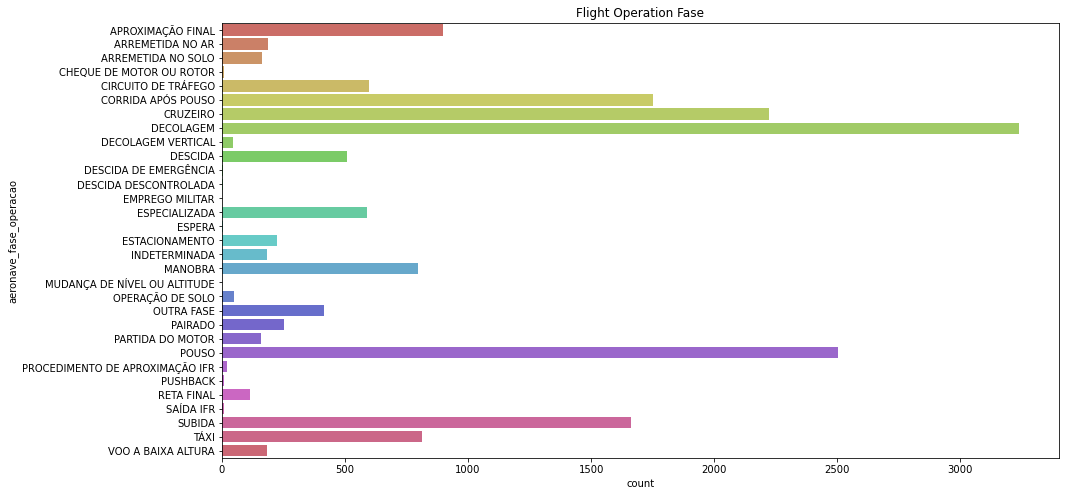

In [281]:
fig = plt.subplots(figsize = (15,8))
sns.countplot( y= 'aeronave_fase_operacao',  data = df2 , palette= 'hls');
plt.title('Flight Operation Fase');


#### Fator_aspecto

Incidente não tem relatório por isso tantos na´s ?

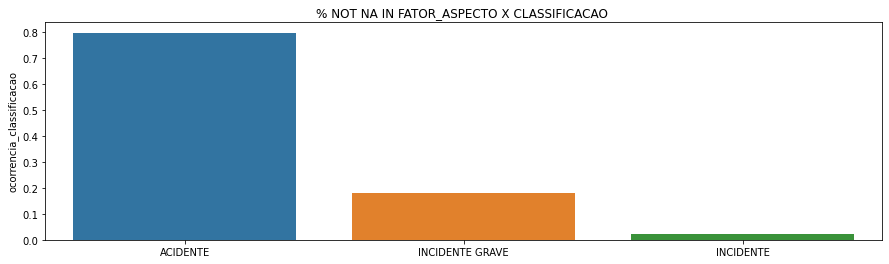

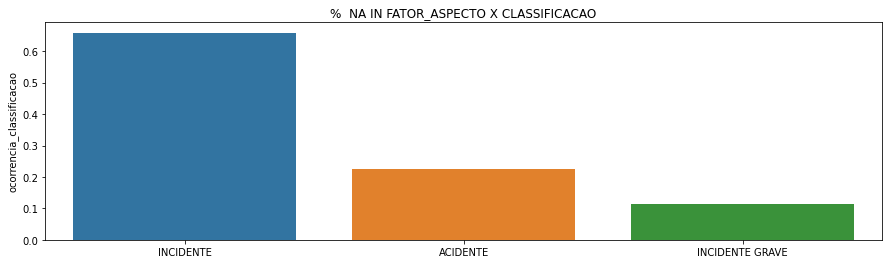

In [282]:
f_aspecto_notna = df2[df2.fator_aspecto.notna()]['ocorrencia_classificacao'].value_counts(normalize=True).to_frame()
f_aspecto_isna = df2[df2.fator_aspecto.isna()]['ocorrencia_classificacao'].value_counts(normalize=True).to_frame()

bar_plot_quantity_value_counts(f_aspecto_notna, 'ocorrencia_classificacao' , '% NOT NA IN FATOR_ASPECTO X CLASSIFICACAO ')
bar_plot_quantity_value_counts(f_aspecto_isna, 'ocorrencia_classificacao' , '%  NA IN FATOR_ASPECTO X CLASSIFICACAO')


In [283]:

pd.pivot_table(df2, values=['ocorrencia_cidade'], index= ['fator_aspecto'], columns=['ocorrencia_classificacao'], aggfunc='count')

ocorrencia_cidade            \
ocorrencia_classificacao                                ACIDENTE INCIDENTE   
fator_aspecto                                                                
ASPECTO DE FABRICAÇÃO                                         50         7   
ASPECTO DE MANUSEIO DO MATERIAL                                3         0   
ASPECTO DE PROJETO                                            34         2   
ASPECTO MÉDICO                                               199         0   
ASPECTO PSICOLÓGICO                                         3867        72   
DESEMPENHO DO SER HUMANO                                    5162       144   
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL               239         8   
ERGONOMIA                                                     20         0   
INFRAESTRUTURA AEROPORTUÁRIA                                 126        35   
INFRAESTRUTURA DE TRÁFEGO AÉREO                               13        11   
OUTRO                                                        168         0   

                                                                
ocorrencia_classificacao                       INCIDENTE GRAVE  
fator_aspecto                                                   
ASPECTO DE FABRICAÇÃO                                       14  
ASPECTO DE MANUSEIO DO MATERIAL                              6  
ASPECTO DE PROJETO                                          20  
ASPECTO MÉDICO                                              39  
ASPECTO PSICOLÓGICO                                        644  
DESEMPENHO DO SER HUMANO                                  1287  
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL              60  
ERGONOMIA                                                   18  
INFRAESTRUTURA AEROPORTUÁRIA                                88  
INFRAESTRUTURA DE TRÁFEGO AÉREO                              9  
OUTRO                                                       60

#### Fator aspecto X fator_condicionante X fator área

Falta de treinamento?

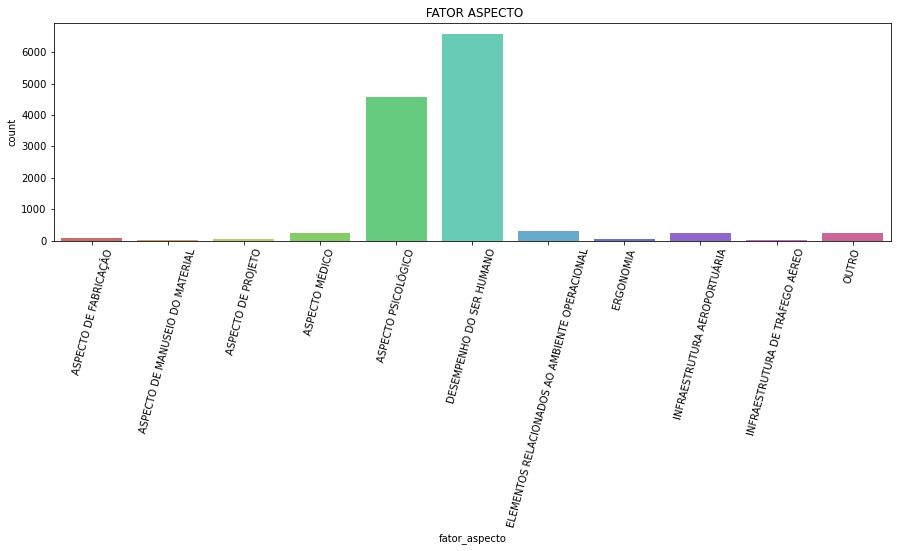

In [284]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_aspecto', data= df2, palette= "hls");
plt.title(' FATOR ASPECTO')
plt.xticks(rotation=75);

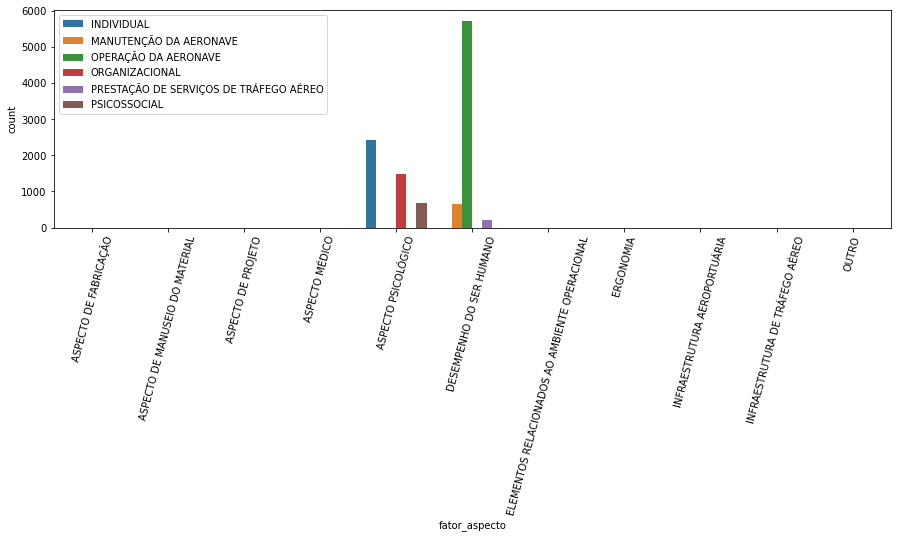

In [285]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_aspecto', hue='fator_condicionante', data= df2);
plt.legend('  FATOR ASPECTO X FATOR CONDICIONANTE')
plt.xticks(rotation=75);
plt.legend(loc= 'upper left');


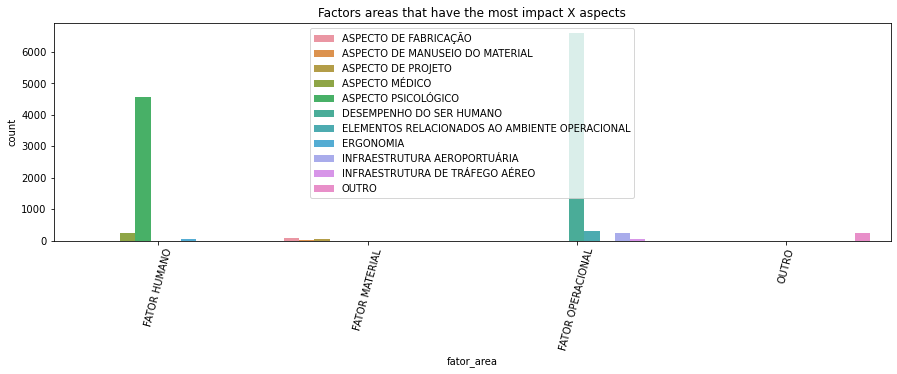

In [286]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_area', hue='fator_aspecto', data= df2);
plt.xticks(rotation=75);
plt.title('Factors areas that have the most impact X aspects');
plt.legend(loc= 'upper center');

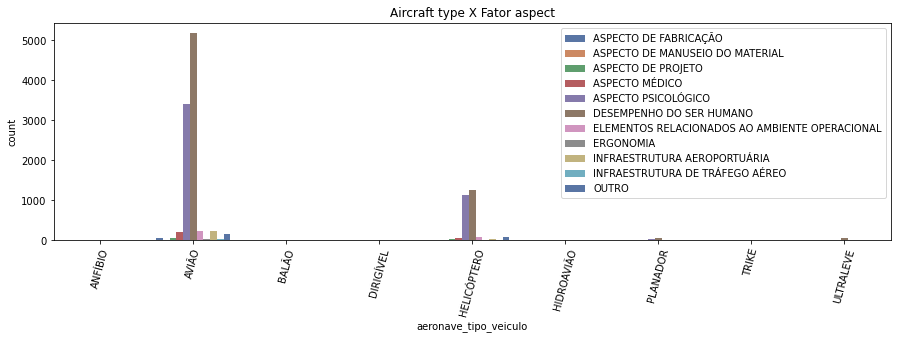

In [287]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'aeronave_tipo_veiculo', hue='fator_aspecto', data= sub_type, palette= 'deep');
plt.xticks(rotation=75);
plt.title('Aircraft type X Fator aspect');
plt.legend(loc= 'upper right');

#### recomendation content

In [288]:

df2.groupby('recomendacao_conteudo')['recomendacao_conteudo'].agg(frequencia_nr='count').sort_values('frequencia_nr', ascending = False)[:30]

,frequencia_nr
recomendacao_conteudo,
"""Realizar o treinamento inicial e recorrente de """"Falha do Motor Durante a Decolagem - Depois da V1"""", de acordo com o L 410 Aircraft Pilot Type Training Program, item 5, páginas 13 e 14.""",72
"Realizar o treinamento de emergências durante o treinamento inicial, parte prática de solo, conforme o Programa de Treinamento do fabricante (L 410 Aircraft Pilot Type Training Program), item B, página 10.",72
"Estabelecer e manter um sistema continuado de análise e supervisão da execução e da eficiência de seu programa de inspeções e de seus programas de manutenção, manutenção preventiva, modificações e reparos, objetivando corrigir eventuais deficiências desses programas, mesmo que eles sejam realizados por terceiros, conforme estabelecido em RBAC 135.431 (a).",38
"Realizar auditoria especial na empresa Target Aviação Ltda. a fim de verificar a adequação dos meios e dos procedimentos de manutenção empregados na manutenção de componentes aeronáuticos e de aeronaves, em conformidade com a regulamentação em vigor.",38
Adotar procedimentos com a finalidade de reduzir a possibilidade de outros ocupantes das aeronaves interferirem na atenção dos pilotos durante a execução dos procedimentos nas diversas fases de voo.,38
"Reavaliar a aceitação do conteúdo do MGO da Oceanair Táxi-Aéreo Ltda., com a finalidade de adequá-lo aos requisitos estabelecidos no RBAC 135, quanto às atribuições do responsável pelo setor de manutenção referentes à supervisão e análise dos registros de manutenção.",38
"Reavaliar a aceitação do conteúdo do MGO da Oceanair Táxi Aéreo Ltda., com a finalidade de adequá-lo aos requisitos estabelecidos no RBAC 135, quanto à utilização de manuais na língua inglesa e, nesses casos, quanto à proficiência exigida para mecânicos e pilotos.",38
"Desenvolver o Manual de Procedimentos Especiais (MPE) previsto em seu MGO e demais procedimentos específicos (SOP), necessários para elevar o nível de padronização, de forma a atingir uma melhor atuação no gerenciamento dos recursos de cabine.",38
"Desenvolver Listas de Equipamentos Mínimos (MEL) para os modelos de aeronaves de sua frota, para assegurar a continuidade das operações em condições de riscos aceitáveis, nos casos de panes de instrumentos ou de equipamentos.",38


#### recomendacao_destinatario_sigla

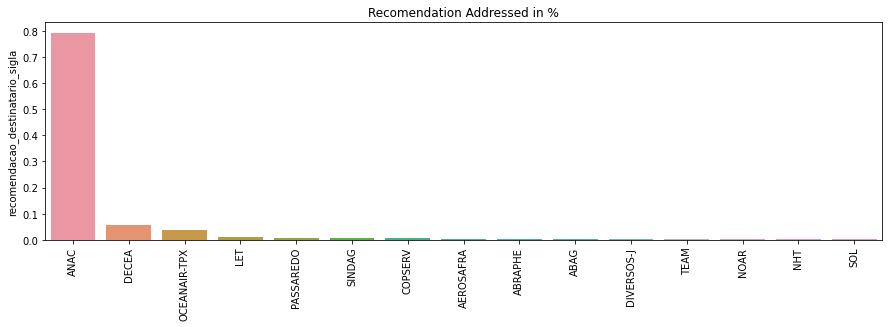

In [291]:
recomendation_address = df2.recomendacao_destinatario_sigla.value_counts(normalize= True).to_frame()[0:15]

bar_plot_quantity_value_counts(recomendation_address, 'recomendacao_destinatario_sigla' , 'Recomendation Addressed in %')
plt.xticks(rotation = 90);



#### recomendation_status

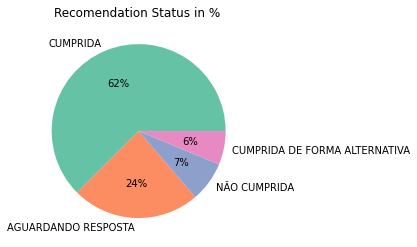

In [292]:
recomendation_status = df2.recomendacao_status.value_counts(normalize= True).to_frame()
colors = sns.color_palette('Set2')
plt.pie(recomendation_status.recomendacao_status,labels = recomendation_status.index,colors = colors,  autopct='%.0f%%');
plt.title("Recomendation Status in % ");

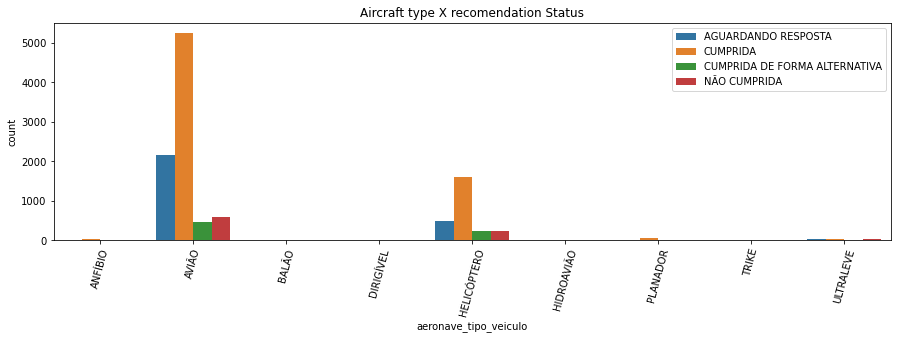

In [293]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'aeronave_tipo_veiculo', hue='recomendacao_status', data= df2 );
plt.xticks(rotation=75);
plt.title('Aircraft type X recomendation Status');
plt.legend(loc= 'upper right');

# 3. Data Preprocessing

In [97]:
df3 = df2.copy()

## 3.1. Check NA

In [92]:
df3.isna().mean()*100

codigo_ocorrencia                   0.000000
codigo_ocorrencia1                  0.000000
codigo_ocorrencia2                  0.000000
codigo_ocorrencia3                  0.000000
codigo_ocorrencia4                  0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 0.000000
ocorrencia_longitude                0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.022668
ocorrencia_pais                     0.000000
ocorrencia_aerodromo               45.239714
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     29.304092
investigacao_status                 2.006120
divulgacao_relatorio_numero        22.928709
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia

### 3.2  Fill Out NA

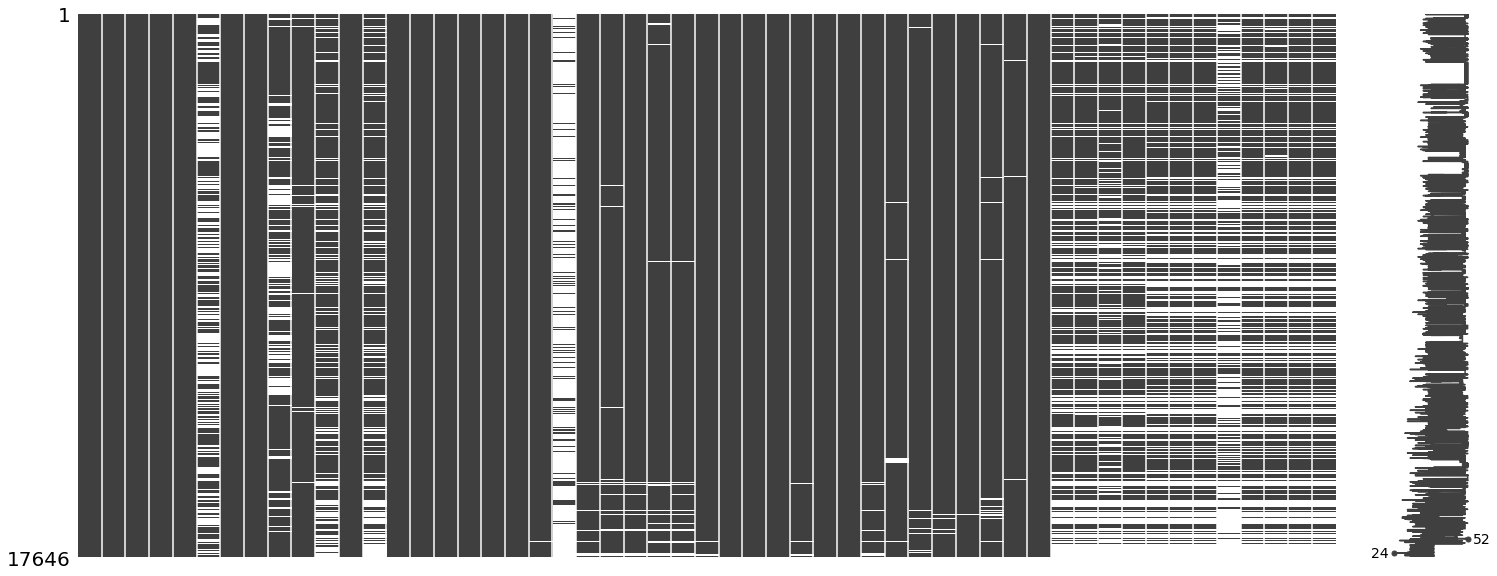

In [297]:
msno.matrix(df3)
plt.show()

strategy adopted:
- analyze the division of values ​​within the features and the percentage of nulls
- if the division within the feature is large between one class and another and the % of nulls is small, I add the nulls to the most frequent feature
- if there is an impact when aggregating nulls to some feature class, drop na´s 
- features occurrence_latitude and longitude NA´s  represent an average of 15%

In [98]:
## na for Most frequent
#ocorrencia_uf - most frequent
df3.ocorrencia_uf.fillna(df3.ocorrencia_uf.value_counts().index[0], inplace=True)

#aeronave_matricula - most frequent
df3.aeronave_matricula.fillna(df3.aeronave_matricula.value_counts().index[0], inplace=True)

#df2.investigacao_status
df3.investigacao_status.fillna(df3.investigacao_status.value_counts().index[0], inplace=True)

# aeronave_tipo_veiculo
df3.aeronave_tipo_veiculo.fillna(df3.aeronave_tipo_veiculo.value_counts().index[0], inplace=True)

#aeronave_motor_tipo
df3.aeronave_motor_tipo.fillna(df3.aeronave_motor_tipo.value_counts().index[0], inplace=True)

# aeronave_motor_quantidade
df3.aeronave_motor_quantidade.fillna(df3.aeronave_motor_quantidade.value_counts().index[0], inplace=True)

#aeronave_registro_categoria
df3.aeronave_registro_categoria.fillna(df3.aeronave_registro_categoria.value_counts().index[0], inplace = True)

#aeronave_voo_origem e destino
df3.aeronave_voo_origem.fillna(df3.aeronave_voo_origem.value_counts().index[0], inplace = True)
df3.aeronave_voo_destino.fillna(df3.aeronave_voo_destino.value_counts().index[0], inplace = True)

#aeronave_fase_operacao
df3.aeronave_fase_operacao.fillna(df3.aeronave_fase_operacao.value_counts().index[0], inplace = True)

#aeronave_nivel_dano 
df3.aeronave_nivel_dano.fillna(df3.aeronave_nivel_dano .value_counts().index[0], inplace = True)

## drop na
#aeronave_fabricante      ocorrencia_hora     
df3.dropna(subset =['ocorrencia_hora', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_ano_fabricacao',  'aeronave_registro_segmento',  'aeronave_registro_categoria', 'aeronave_tipo_operacao'], inplace=True)



In [99]:
#investigacao_aeronave_liberada - Suposições:
## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
# NAO se divulgacao_relatorio_publicado == NAO 
# os na´s que sobreram drop =647 
df3.loc[ (df3['investigacao_aeronave_liberada'].isna()) & (df3['investigacao_status']== 'FINALIZADA') & (df3['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
df3.loc[ ( df3['investigacao_aeronave_liberada'].isna() ) & ( df3.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
df3.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


# recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df3.loc[ df3['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

# para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
#recomendacao_dia_encaminhamento    5698
# não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
df3.loc[df3['recomendacao_dia_encaminhamento'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0


# set categoria
df3['recomendacao_conteudo'] = df3['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

# recomendacao_conteudo
df3.loc[df1['recomendacao_conteudo'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
# o restante vou dropar 
df3.dropna(subset =['recomendacao_conteudo'], inplace=True)


#set categoria
df3['recomendacao_destinatario'] = df3['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
# recomendacao_destinatario
df3.loc[df3['recomendacao_destinatario'].isna()  & (df3['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

# fill with 0 (so I can filter later)
#set category
df3['divulgacao_dia_publicacao'] = df3['divulgacao_dia_publicacao'].cat.add_categories(0)
df3.divulgacao_dia_publicacao.fillna(0, inplace = True)

In [316]:
#df3.to_csv('./data/ocorrencias_aeronauticas_cleaned_ok.csv', index=False)

# 4. Feature Engineering

In [317]:
df4= pd.read_csv('./data/ocorrencias_aeronauticas_cleaned_ok.csv')

In [107]:
df4 = df3

In [108]:
print( 'Number of Rows: {}'.format( df4.shape[0] ) )
print( 'Number of Cols: {}'.format( df4.shape[1] ) )

Number of Rows: 14309
Number of Cols: 53


In [323]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14309 entries, 0 to 17644
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ocorrencia_classificacao         14309 non-null  category      
 1   ocorrencia_latitude              14309 non-null  category      
 2   ocorrencia_longitude             14309 non-null  category      
 3   ocorrencia_cidade                14309 non-null  category      
 4   ocorrencia_uf                    14309 non-null  category      
 5   ocorrencia_dia                   14309 non-null  datetime64[ns]
 6   ocorrencia_hora                  14309 non-null  category      
 7   investigacao_aeronave_liberada   14309 non-null  category      
 8   investigacao_status              14309 non-null  category      
 9   divulgacao_relatorio_publicado   14309 non-null  category      
 10  divulgacao_dia_publicacao        14309 non-null  category 

## 4.1 Criacao das Hipoteses

**Avião**
- Aviões com mais motores sofrem menos acidentes ? aeronave_motor_quantidade
- Aviões particulares sofrem mais acidentes que o resto ? aeronave_operador_categoria, aeronave_tipo_operacao
- Em Aeronaves mais novas há menos ocorrência ?  
- Modelo da aeronave influencia? 
- Monomotor e bimotor tem mais ocorrencias ? (Quantidade de Turbinas) aeronave_motor_quantidade
- Qualidade do combustível (fornecedor)
- Helicopteros sofrem mais ocorrencias que aviões comuns  ? Deste quais são considerados mais graves?  aeronave_nivel_dano aeronave_registro_categoria
- Quanto mais assentos menos há a ocorrência de acidentes ? São menos graves ? aeronave_assentos, ocorrencia_classificacao

**Fator Humano** 
- Anos de Experiência dos pilotos influencia na gravidade do acidente?
- Treinamento constante (mínimo 2 x ano) inibem ocorrencias?
- Fator humano é a causa principal das ocorrencias?

**Fase no vôo**
- No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? aeronave_fase_operacao

**Peças**
- quais as peças que dão mais acidente
- Peso do avião (excesso ou falta de carga)?
- Excesso de carga ?
- Origem das peças usadas na manutenção.

**Ambiente**
- Temperatura
- Humindade do ar
- Velocidade do vento

- No Sudeste tem menos acidente que no resto do país (frequencia relativa)? 
- Final da tarde tem mais acidente por conta do escurecer? (das 16hs as 20hs ) ocorrencia_hora


### 4.1.1 Seleção Hipoteses

**Fase no vôo**
- No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? aeronave_fase_operaca

**Ambiente/Região" 
- No Sudeste tem menos acidente que no resto do país (frequencia relativa)? 
- Final da tarde tem mais acidente por conta do escurecer? (das 16hs as 20hs ) ocorrencia_hora

**Fator Humano** 
- Fator humano é a causa principal das ocorrencias?

**Avião**
- Aviões com mais motores sofrem menos acidentes ? aeronave_motor_quantidade
- Aviões particulares sofrem mais acidentes que o resto ? aeronave_operador_categoria, aeronave_tipo_operacao
- Em Aeronaves mais novas há menos ocorrência ?  
- Modelo da aeronave influencia? 
- Monomotor e bimotor tem mais ocorrencias ? (Quantidade de Turbinas) aeronave_motor_quantidade
- Qualidade do combustível (fornecedor)
- Helicopteros sofrem mais ocorrencias que aviões comuns  ? Deste quais são considerados mais graves?  aeronave_nivel_dano aeronave_registro_categoria
- Quanto mais assentos menos há a ocorrência de acidentes ? São menos graves ? aeronave_assentos, ocorrencia_classificacao



## 4.2 Feature Engeneering

In [109]:
# month
df4['month'] = df4['ocorrencia_dia'].dt.month
# day
df4['day'] = df4['ocorrencia_dia'].dt.day
# week of year
df4['week_of_year'] = df4['ocorrencia_dia'].dt.weekofyear


# divulgacao_dia_publicacao
df4['divulgacao_dia_publicacao'] = pd.to_datetime(df4.divulgacao_dia_publicacao)

df4['waiting_days_publish'] = ((df4['divulgacao_dia_publicacao'] - df4.ocorrencia_dia)).apply(lambda x:x.days ).astype(int)
df4['waiting_days_publish'] = df4['waiting_days_publish'].apply( lambda x: 20000 if x < 0 else x)

In [112]:
df4.sample(3)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,month,day,week_of_year,waiting_days_publish
11615,ACIDENTE,-3.7325,-38.7119444444,CAUCAIA,CE,NaN,2015-06-26,19:38:00,SIM,FINALIZADA,A-092/CENIPA/2015,SIM,2017-02-08,8,1,NÃO,OUTROS,OUTROS,OTHR,PREES,NaN,HELICÓPTERO,EUROCOPTER DEUTSCHLAND,BK117 C-2,EC45,TURBOEIXO,BIMOTOR,3585,3585,9,2013.0,BRASIL,BRASIL,HELICÓPTERO,ADMINISTRAÇÃO DIRETA,PINTO MARTINS,FORA DE AERODROMO,PAIRADO,POLICIAL,NENHUM,0,CULTURA DO GRUPO DE TRABALHO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO,A-092/CENIPA/2015 - 05,2017-02-08 00:00:00,2017-02-16 00:00:00,2017-05-24,Atuar junto a CIOPAER visando à padronização d...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,6,26,26,593
9418,ACIDENTE,-5.0605555556,-42.8244444444,TERESINA,PI,SBTE,2013-12-16,21:48:00,SIM,FINALIZADA,A-223/CENIPA/2013,SIM,2016-02-29,6,1,NÃO,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,PTCNL,NaN,AVIÃO,CESSNA AIRCRAFT,172A,C172,PISTÃO,MONOMOTOR,998,998,4,1960.0,BRASIL,BRASIL,AVIÃO,INSTRUÇÃO,SENADOR PETRÔNIO PORTELLA,SENADOR PETRÔNIO PORTELLA,DECOLAGEM,INSTRUÇÃO,DESTRUÍDA,4,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-223/CENIPA/2013 – 02,2016-02-29 00:00:00,2016-04-14 00:00:00,2016-06-07,Certificar-se da adequação dos métodos de Supe...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,12,16,51,805
3798,ACIDENTE,-28.4605555556,-53.5766666667,PEJUÇARA,RS,NaN,2011-02-15,13:10:00,SIM,FINALIZADA,A-050/CENIPA/2012,SIM,2012-07-02,5,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,PRAAK,NaN,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1497,1497,1,1977.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,SUBSTANCIAL,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,206/2012,2012-07-02 00:00:00,2012-08-08 00:00:00,2012-11-28,"Atuar junto à BRISA Aviação Agrícola Ltda, a f...",CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2,15,7,503


# 5. Filtragem de Variáveis

In [116]:
df5 = df4.copy()

In [ ]:
## Dataframe for General Proposal - No 

In [153]:
df5[df5.ocorrencia_latitude == 'nan']
df5 == 'nan'

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_aspecto,fator_condicionante,fator_area,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,month,day,week_of_year,waiting_days_publish
0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 5.2 Column Filtering

In [117]:
#Excluindo as colunas duplicadas ou com muitos valores faltantes
cols_drop = ['aeronave_operador_categoria', 'aeronave_pais_registro', 'ocorrencia_aerodromo', 'recomendacao_dia_feedback', 'divulgacao_relatorio_numero', 'fator_nome', 'recomendacao_numero']
df5.drop(cols_drop, axis=1, inplace=True)

### 5.1 Row Filtering

In [157]:
df5[df5.waiting_days_publish != 20000][df5.ocorrencia_latitude !=0][df5.ocorrencia_longitude != 0][df5.ocorrencia_latitude != 'nan'][df5.ocorrencia_longitude != 'nan']

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_aspecto,fator_condicionante,fator_area,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,month,day,week_of_year,waiting_days_publish
10,INCIDENTE GRAVE,-6.5319444444,-64.3805555556,CANUTAMA,AM,2010-01-09,12:30:00,SIM,FINALIZADA,SIM,2011-07-21,3,1,NÃO,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PTEVH,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7,1979.0,BRASIL,AVIÃO,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,PRIVADA,LEVE,0,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2011-07-21 00:00:00,2011-08-09 00:00:00,Impedir a operação a operação de aeronaves até...,AGUARDANDO RESPOSTA,PREF-CANUTAMA,PREFEITURA MUNICIPAL DE CANUTAMA-AM,1,9,1,558
11,INCIDENTE GRAVE,-6.5319444444,-64.3805555556,CANUTAMA,AM,2010-01-09,12:30:00,SIM,FINALIZADA,SIM,2011-07-21,3,1,NÃO,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PTEVH,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7,1979.0,BRASIL,AVIÃO,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,PRIVADA,LEVE,0,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2011-07-21 00:00:00,2011-08-09 00:00:00,Viabilizar estudos e projetos de infra-estrutu...,AGUARDANDO RESPOSTA,PREF-CANUTAMA,PREFEITURA MUNICIPAL DE CANUTAMA-AM,1,9,1,558
12,INCIDENTE GRAVE,-6.5319444444,-64.3805555556,CANUTAMA,AM,2010-01-09,12:30:00,SIM,FINALIZADA,SIM,2011-07-21,3,1,NÃO,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PTEVH,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7,1979.0,BRASIL,AVIÃO,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,PRIVADA,LEVE,0,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2011-07-21 00:00:00,2011-08-09 00:00:00,Propor a homologação do aeródromo à Agência Na...,AGUARDANDO RESPOSTA,PREF-CANUTAMA,PREFEITURA MUNICIPAL DE CANUTAMA-AM,1,9,1,558
13,INCIDENTE GRAVE,-6.5319444444,-64.3805555556,CANUTAMA,AM,2010-01-09,12:30:00,SIM,FINALIZADA,SIM,2011-07-21,3,1,NÃO,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PTEVH,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7,1979.0,BRASIL,AVIÃO,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,PRIVADA,LEVE,0,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,2011-07-21 00:00:00,2011-08-09 00:00:00,Impedir a operação a operação de aeronaves até...,AGUARDANDO RESPOSTA,PREF-CANUTAMA,PREFEITURA MUNICIPAL DE CANUTAMA-AM,1,9,1,558
14,INCIDENTE GRAVE,-6.5319444444,-64.3805555556,CANUTAMA,AM,2010-01-09,12:30:00,SIM,FINALIZADA,SIM,2011-07-21,3,1,NÃO,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PTEVH,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7,1979.0,BRASIL,AVIÃO,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,PRIVADA,LEVE,0,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,2011-07-21 00:00:00,2011-08-09 00:00:00,Viabilizar estudos e projetos de infra-estrutu...,AGUARDANDO RESPOSTA,PREF-CANUTAMA,PREFEITURA MUNICIPAL DE CANUTAMA-AM,1,9,1,558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [146]:
df5.isnull().sum()


ocorrencia_classificacao              0
ocorrencia_latitude                   0
ocorrencia_longitude                  0
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_aeronave_liberada        0
investigacao_status                   0
divulgacao_relatorio_publicado        0
divulgacao_dia_publicacao             0
total_recomendacoes                   0
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_tipo                       0
ocorrencia_tipo_categoria             0
taxonomia_tipo_icao                   0
aeronave_matricula                    0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    0
aeronave_motor_tipo                   0
aeronave_motor_quantidade             0
aeronave_pmd                          0


In [119]:
df5.sample(2)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_aspecto,fator_condicionante,fator_area,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,month,day,week_of_year,waiting_days_publish
6568,ACIDENTE,-1.3611111111,-48.3566666667,MARITUBA,PA,2012-02-22,13:40:00,SIM,FINALIZADA,SIM,2016-11-24,9,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,PTYAK,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,AS50,TURBOEIXO,MONOMOTOR,2100,2100,6,1995.0,BRASIL,HELICÓPTERO,ADMINISTRAÇÃO DIRETA,VAL DE CANS / JÚLIO CEZAR RIBEIRO,VAL DE CANS / JÚLIO CEZAR RIBEIRO,OUTRA FASE,POLICIAL,SUBSTANCIAL,0,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2012-06-20 00:00:00,2016-01-11 00:00:00,Atuar junto ao GRAESP/PA que escale para compo...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,2,22,8,1737
4612,ACIDENTE,-16.6455555556,-39.095,PORTO SEGURO,BA,2011-06-17,21:49:00,SIM,FINALIZADA,SIM,2012-08-07,9,1,NÃO,VOO CONTROLADO CONTRA O TERRENO,VOO CONTROLADO CONTRA O TERRENO,CFIT,PROMO,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 B2,AS50,TURBOEIXO,MONOMOTOR,2250,2250,6,2008.0,BRASIL,HELICÓPTERO,PARTICULAR,PORTO SEGURO,CONDOMÍNIO JACUMÃ OCEAN RESORT,CRUZEIRO,PRIVADA,DESTRUÍDA,7,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2012-08-07 00:00:00,2012-10-16 00:00:00,Incrementar a fiscalização das aeronaves utili...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,6,17,24,417


In [365]:

cat_attributes = df2.select_dtypes( exclude=['int32', 'float64', 'datetime64[ns]'] )


cat_attributes.drop(['recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'divulgacao_dia_publicacao'], axis=1, inplace=True)

C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 1.6.2 Categorical Attributes

In [ ]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

In [ ]:
sns.catplot(data=df1, x="aeronave_assentos", y="ocorrencia_classificacao", kind="box");

In [ ]:
#ocorrencia_classificacao 
sns.catplot(data=df1, x="aeronave_assentos", y="aeronave_nivel_dano", hue="ocorrencia_saida_pista", kind="bar");

In [ ]:
sns.catplot(data=df1, y="aeronave_registro_categoria", x="aeronave_ano_fabricacao" , kind="bar");


In [ ]:
aux = df1.loc[df1.aeronave_motor_tipo != ("***"), :]
fig = plt.subplots(figsize = (15,4))
sns.countplot(x = 'aeronave_motor_tipo', data = aux);

In [ ]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='ocorrencia_uf', data = df1);

## 4.2. Analise das Hipóteses

### H.1 - No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? 
***VERDADEIRO** Sim, to total 18.63% referem-se a decolagem e somente 13,03% no Pouso 

In [ ]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_fase_operacao', data = df1)
plt.xticks(rotation=-80);

In [ ]:
df4.aeronave_fase_operacao.value_counts()

### H.2 No Sudeste tem menos acidente que no resto do país?
***FALSO*** No sudeste são concentrados aprox. 37% das ocorrências, apesar de SP e RJ terem um maior número de casos.

In [ ]:
fig = plt.subplots(figsize = (20,8))
df4.ocorrencia_uf.value_counts().plot.barh();

In [ ]:
df4.ocorrencia_uf.value_counts()

In [ ]:
sudeste = df4[(df4.ocorrencia_uf == 'SP') | (df4.ocorrencia_uf == 'RJ')  | (df4.ocorrencia_uf == 'ES') | (df4.ocorrencia_uf == 'MG')]['ocorrencia_uf'].count()
total= df4.ocorrencia_uf.count()
percent = sudeste/total*100
print('No sudeste acontecem {}% das ocorrencias'.format(round(percent,2) ))

### H.3     Em Aeronaves mais novas há menos ocorrência  se houver mais  motores ? Aviões particulares sofrem mais acidentes que o resto ?
**SIM e NÃO**  Mais novos (0 e 1 ano) a maioria refere-se aos aviões regulares, bimotores e monomotores 

In [ ]:
a = df4[(df4.aeronave_operador_categoria != "***") & (df4.aeronave_ano_fabricacao < 2)]
px.histogram(a, x='aeronave_operador_categoria',  color="aeronave_ano_fabricacao")

In [ ]:
sns.catplot(data=df4, y="aeronave_ano_fabricacao", x="aeronave_tipo_operacao" , kind="bar");
plt.xticks(rotation=-25);

In [ ]:

sns.catplot(data=df4, y="aeronave_ano_fabricacao", x="aeronave_motor_quantidade" , kind="bar");

#sns.catplot(data=a, x="aeronave_motor_quantidade", y="aeronave_ano_fabricacao", hue="aeronave_operador_categoria", kind="bar");
plt.xticks(rotation=-25);

### H.4 Helicopteros sofrem mais ocorrencias que aviões comuns ? Deste quais são considerados mais graves?
*** Não*** Aviões tem mais ocorrencia que helicopteros e tem um nível de dano maior

In [ ]:

sns.histplot(df4['aeronave_registro_categoria']);
plt.xticks(rotation=-90);

In [ ]:
mask = df4.aeronave_registro_categoria.isin(["HELICÓPTERO", "AVIÃO" ])
a = df4[mask]

a[['aeronave_nivel_dano','aeronave_registro_categoria']]
df4[mask].groupby(['aeronave_registro_categoria',"aeronave_nivel_dano" ] ).agg({"aeronave_nivel_dano": "count"}).plot.area()  ;


# 5.0 Deploy

In [ ]:
class aviation_occurencies:
    def __init__( self ):
        self.home_path = 'G:/DADOS/Documents/CURSOS_Dev/A3Data'
        
    def data_collect(self):
        ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
        tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
        aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
        fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
        rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


        #merge
        aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
        aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
        aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
        df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )
    
        return df_raw

    

    def data_clenning(self, df1):
        #ocorrencia_dia - mudar para datetime 
        df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')
        df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%Y-%m-%d')


        # recomendacao_dia_encaminhamento - 0 se dia for data com má formato 
        df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: 0 if ((x == '0002-11-29') or( x =='0002-11-24')or (x == '0002-11-17') or (x == '0002-11-27') or (x == '0002-11-26')) else x )
        df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


        #recomendacao_dia_feedback
        #df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply(lambda x: 0 if ((x == '0000-00-00') or (x == '0002-11-29') or (x == '0002-11-21') or (x == '0002-11-23')) else x)
        #df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

        #recomendacao_dia_assinatura
        df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')
        # convertendo os dados numéricos
        for c in df1.select_dtypes( include=['int64'] ):
            df1[c] = df1[c].astype('int32')

        #   aeronave_ano_fabricacao         
        df1['aeronave_ano_fabricacao'] = df1['aeronave_fatalidades_total'].astype('int32')
        df1['aeronave_assentos'].fillna(0, inplace=True )
        df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

        # convertendo os dados categóricos
        for c in df1.select_dtypes( include=['object'] ):
            df1[c] = df1[c].astype('category')

        #excluindo 
        df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4','divulgacao_relatorio_numero','ocorrencia_pais', 'recomendacao_numero', 'recomendacao_dia_feedback' , 'recomendacao_destinatario_sigla', 'aeronave_matricula', 'aeronave_pmd', 'aeronave_pmd_categoria'], axis=1, inplace=True)


        #correncia_latitude  como todas com na tem 'ocorrencia_cidade', colocar 0 para manter as linhas
        df1.dropna(subset =['ocorrencia_latitude'], inplace=True)


        #ocorrencia_longitude                1581
        df1.dropna(subset =['ocorrencia_longitude'], inplace=True)


        #ocorrencia_hora       drop
        df1.dropna(subset =['ocorrencia_hora'], inplace=True)

        #investigacao_aeronave_liberada - Suposições:
        ## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
        # NAO se divulgacao_relatorio_publicado == NAO 
        # os na´s que sobreram drop =647 
        df1.loc[ (df1['investigacao_aeronave_liberada'].isna()) & (df1['investigacao_status']== 'FINALIZADA') & (df1['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
        df1.loc[ ( df1['investigacao_aeronave_liberada'].isna() ) & ( df1.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
        df1.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


        #investigacao_status                    
        df1.dropna(subset =['investigacao_status'], inplace=True)


        #divulgacao_dia_publicacao           
        df1['divulgacao_dia_publicacao'] = df1['divulgacao_dia_publicacao'].cat.add_categories("0").fillna("0")

        #aeronave_voo_origem                    1
        df1.dropna(subset =['aeronave_voo_origem'], inplace=True)

        # aeronave_motor_tipo
        df1.dropna(subset =['aeronave_motor_tipo'], inplace=True)


        ## 4799  ou 28% do db como o obj. criei cat 'não informado'                         
        df1['fator_nome'] = df1['fator_nome'].cat.add_categories("não informado").fillna("não informado")                     
        df1['fator_aspecto'] = df1['fator_aspecto'].cat.add_categories("não informado").fillna("não informado")
        df1['fator_condicionante'] = df1['fator_condicionante'].cat.add_categories("não informado").fillna("não informado")
        df1['fator_area'] = df1['fator_area'].cat.add_categories("não informado").fillna("não informado")

        # recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
        df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

        # para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
        #recomendacao_dia_encaminhamento    5698
        # não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
        df1.loc[df1['recomendacao_dia_encaminhamento'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0
        df1['recomendacao_dia_encaminhamento'].fillna(0, inplace=True )


        # set categoria
        df1['recomendacao_conteudo'] = df1['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

        # recomendacao_conteudo
        df1.loc[df1['recomendacao_conteudo'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
        # o restante vou dropar 
        df1.dropna(subset =['recomendacao_conteudo'], inplace=True)

        # recomendacao_conteudo
        df1.loc[df1['recomendacao_status'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_status'] = "***"
        df1.dropna(subset =['recomendacao_status'], inplace=True)


        #set categoria
        df1['recomendacao_destinatario'] = df1['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
        # recomendacao_destinatario
        df1.loc[df1['recomendacao_destinatario'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

        return df1


    def filtering_data(self, df1):
        # Filtrando
        df2 = df1.loc[(df1['ocorrencia_latitude'] != "***") & (df1['ocorrencia_longitude'] != "***") & (df1.aeronave_motor_tipo != "***") & (df1.aeronave_nivel_dano != "***"), :]

        return df2


In [ ]:
if __name__ == '__main__':
    # Instancia
    aviacao = aviation_occurencies()

    #Coleta
    data_raw = aviacao.data_collect()

    #Limpa
    df1 = aviacao.data_clenning(data_raw)

    # Filtra
    df2 = aviacao.filtering_data(df1)


In [ ]:
df2.head()

In [ ]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Cols: {}'.format( df2.shape[1] ) )